<a href="https://colab.research.google.com/github/PuspanjaliMuduli17/Deep_Learning/blob/main/Cat_Vs_Dog.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:49<00:00, 21.4MB/s]
100% 1.06G/1.06G [00:49<00:00, 23.0MB/s]


In [3]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [6]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label
train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

In [7]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 77s 107ms/step - loss: 1.3644 - accuracy: 0.5789 - val_loss: 1.2517 - val_accuracy: 0.5836
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6111 - accuracy: 0.6757 - val_loss: 0.6383 - val_accuracy: 0.6670
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5225 - accuracy: 0.7424 - val_loss: 0.4879 - val_accuracy: 0.7638
Epoch 4/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4641 - accuracy: 0.7742 - val_loss: 0.4704 - val_accuracy: 0.7688
Epoch 5/10
625/625 [==============================] - 67s 107ms/step - loss: 0.4013 - accuracy: 0.8062 - val_loss: 0.6503 - val_accuracy: 0.6810
Epoch 6/10
625/625 [==============================] - 64s 103ms/step - loss: 0.3518 - accuracy: 0.8349 - val_loss: 0.4657 - val_accuracy: 0.8024
Epoch 7/10
331/625 [==============>...............] - ETA: 26s - loss: 0.3211 - accuracy: 0.8528

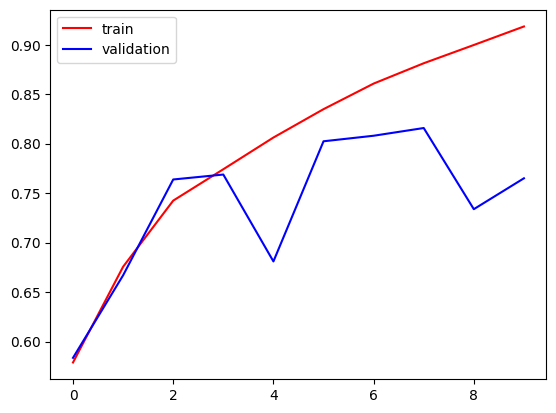

In [13]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

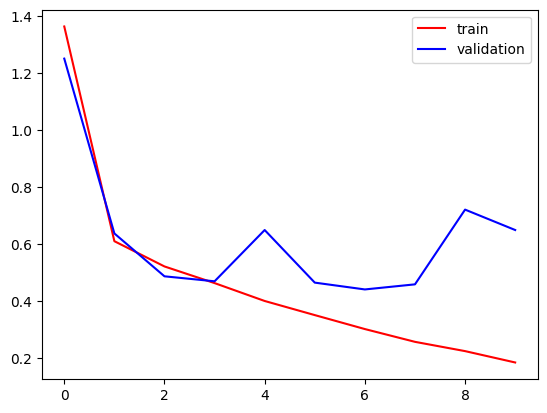

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
import cv2

In [22]:
test_img = cv2.imread('/content/dog.png')

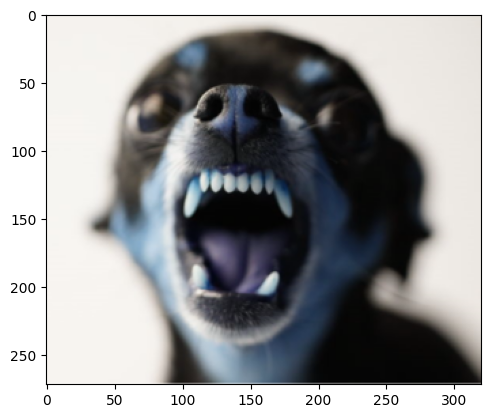

In [23]:
plt.imshow(test_img)

In [24]:
test_img.shape

(272, 320, 3)

In [25]:
test_img = cv2.resize(test_img,(256,256))

In [26]:
test_input = test_img.reshape((1,256,256,3))

In [27]:
model.predict(test_input)

1/1 [==============================] - 0s 17ms/step


array([[1.]], dtype=float32)

In [37]:
test_img2 = cv2.imread('/content/cat.jpg')

In [39]:
test_img2.shape
test_img2= cv2.resize(test_img2,(256,256))
test_input = test_img2.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 32ms/step


array([[0.]], dtype=float32)

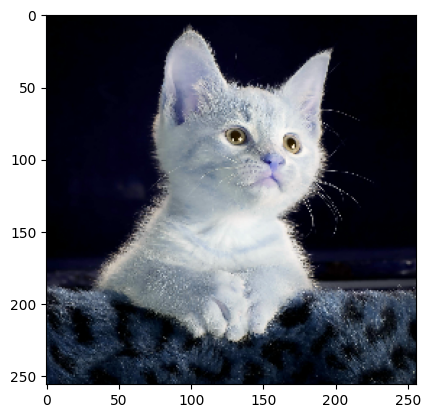

In [40]:
plt.imshow(test_img2)